In [29]:
!pip install graphviz

In [1]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as po
from sklearn.preprocessing import LabelEncoder

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=10)

In [33]:
df=pd.read_csv('C:/Users/User/Desktop/디지털하나로/CardData_new.csv',encoding='cp949')
df

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉건수_R12M,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분
0,YNtSN9Oa,2,64,1,20140709,54,1,0,0,0,...,3,3,2,5,5,5,9,0,0,21.Active_연속
1,Rijqdlzu,1,24,1,20170412,21,0,0,0,0,...,0,0,0,12,5,5,14,2,2,21.Active_연속
2,NOsf3TZS,2,43,1,20170426,21,1,0,1,0,...,0,0,0,12,0,0,0,12,12,21.Active_연속
3,7IPZGTZu,2,79,1,20141128,50,0,0,0,0,...,16,15,5,1,3,3,6,0,0,21.Active_연속
4,pEEsUF2u,2,82,1,20120905,76,0,0,0,0,...,4,4,3,1,1,1,4,3,2,21.Active_연속
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,Gso9Jlid,2,47,1,20170630,18,0,0,0,0,...,3,3,2,9,5,5,16,0,0,21.Active_연속
299996,EDQYlTTX,2,69,1,20150417,45,0,0,0,0,...,2,2,2,1,0,0,0,12,12,22.Active_간헐
299997,82GwFS1D,1,36,1,20120608,79,0,0,0,0,...,0,0,0,12,0,0,0,12,12,21.Active_연속
299998,LUYeNjki,1,48,1,20120508,80,1,0,0,0,...,0,0,0,12,0,0,0,12,12,21.Active_연속


In [3]:
df.columns

Index(['회원번호', '남녀구분코드', '연령', '소지여부_신용', '입회일자_신용', '입회경과개월수_신용', '탈회여부',
       '회원여부_연체', '수신거부여부_TM', '수신거부여부_DM',
       ...
       '캠페인접촉건수_R12M', '캠페인접촉일수_R12M', '캠페인접촉월수_R12M', '접촉후경과월_R12M',
       '보험콜대상월수_R12M', '보험콜대상횟수_R12M', '보험콜통화횟수_R12M', '보험콜배정후경과월_R12M',
       '보험콜통화후경과월_R12M', '고객구분'],
      dtype='object', length=302)

In [34]:
df.loc[df['고객구분'].isin(['34.휴면_9M+','31.휴면_3M','33.휴면_9M-', '32.휴면_6M-']),'고객구분'] = '휴면'

In [5]:
X = df.drop(columns=['회원번호','남녀구분코드','자격기준','자격구분상세','연회비청구구분_B0M','거주시도명','거주시군구명','직장시도명','직장시군구명','Life_Stage',
        '고객구분','_1순위신용체크구분','이용금액대',],axis=1)

y = df['고객구분']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [6]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

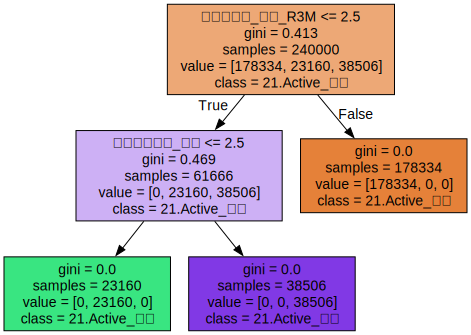

In [7]:
from sklearn.tree import export_graphviz


# export_graphviz() 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=y, \
               feature_names = X.columns, impurity=True, filled=True)
               

with open("tree.dot", encoding="utf-8") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [35]:
X = df.drop(columns=['회원번호','남녀구분코드','자격기준','자격구분상세','연회비청구구분_B0M','거주시도명','거주시군구명','직장시도명','직장시군구명','Life_Stage',
        '고객구분','_1순위신용체크구분','이용금액대',],axis=1)

y = df['고객구분']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [12]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

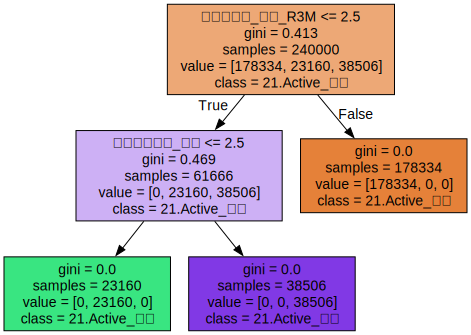

In [13]:
from sklearn.tree import export_graphviz


# export_graphviz() 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=y, \
               feature_names = X.columns, impurity=True, filled=True)
               

with open("tree.dot", encoding="utf-8") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [17]:
df['고객구분'].value_counts()

21.Active_연속    222863
휴면               48102
22.Active_간헐     29035
Name: 고객구분, dtype: int64

In [36]:
df1=df[df['고객구분'] == '21.Active_연속']
df2 = df1.sample(n=40000, random_state=42)

In [37]:
df2

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉건수_R12M,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분
159882,yqynMez3,2,44,1,20161018,27,0,0,1,1,...,0,0,0,12,0,0,0,12,12,21.Active_연속
50633,EB0GYUYG,2,62,1,20171017,15,1,0,0,0,...,12,11,6,2,2,2,8,1,0,21.Active_연속
195274,uSdVrL2y,2,47,1,20050921,160,1,0,0,0,...,1,1,1,1,0,0,0,12,12,21.Active_연속
13202,gwS9lWrR,2,49,1,20140724,54,0,0,1,1,...,0,0,0,12,0,0,0,12,12,21.Active_연속
208687,YUSrGrhc,1,60,1,19950822,281,1,0,1,1,...,0,0,0,12,0,0,0,12,12,21.Active_연속
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272249,rxpWtWJN,2,39,1,20020309,202,1,0,1,0,...,0,0,0,12,0,0,0,12,12,21.Active_연속
214191,1vD0fz0x,1,27,1,20170928,16,1,0,0,0,...,3,2,2,1,6,6,8,2,2,21.Active_연속
177808,Hj2VXI5l,1,57,1,20051226,157,0,0,1,1,...,0,0,0,12,0,0,0,12,12,21.Active_연속
11379,phyr3b6e,1,42,1,20150902,40,1,0,1,0,...,0,0,0,12,0,0,0,12,12,21.Active_연속


In [38]:
df3=df[df['고객구분'] != '21.Active_연속']
df3

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉건수_R12M,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분
8,9QifHQRq,2,38,1,20120822,77,0,0,0,0,...,1,1,1,1,0,0,0,12,12,휴면
15,RM6mSMbs,1,47,1,20130124,72,0,0,1,1,...,0,0,0,12,0,0,0,12,12,휴면
18,Yu0oqOMi,2,46,0,20151119,38,0,0,1,1,...,1,1,1,6,0,0,0,12,12,휴면
19,LDhsZIdO,2,54,0,20140218,59,0,0,1,1,...,0,0,0,12,0,0,0,12,12,휴면
20,Cr9MNwh4,1,45,1,20141210,49,1,0,0,0,...,0,0,0,12,0,0,0,12,12,휴면
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299975,aEiVZNMH,1,35,1,20060510,152,0,0,1,1,...,2,2,1,0,0,0,0,12,12,22.Active_간헐
299984,l9VYsvPJ,1,34,1,20180328,10,1,0,0,0,...,2,1,1,8,0,0,0,12,12,휴면
299989,O1qOMZzf,2,39,1,20040914,172,1,0,0,0,...,9,9,5,5,1,1,3,1,1,22.Active_간헐
299992,dSMx8yKD,2,36,1,20150421,45,1,0,0,0,...,1,1,1,11,2,2,2,5,5,휴면


In [39]:
df4=pd.concat([df2,df3])
df4

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉건수_R12M,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분
159882,yqynMez3,2,44,1,20161018,27,0,0,1,1,...,0,0,0,12,0,0,0,12,12,21.Active_연속
50633,EB0GYUYG,2,62,1,20171017,15,1,0,0,0,...,12,11,6,2,2,2,8,1,0,21.Active_연속
195274,uSdVrL2y,2,47,1,20050921,160,1,0,0,0,...,1,1,1,1,0,0,0,12,12,21.Active_연속
13202,gwS9lWrR,2,49,1,20140724,54,0,0,1,1,...,0,0,0,12,0,0,0,12,12,21.Active_연속
208687,YUSrGrhc,1,60,1,19950822,281,1,0,1,1,...,0,0,0,12,0,0,0,12,12,21.Active_연속
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299975,aEiVZNMH,1,35,1,20060510,152,0,0,1,1,...,2,2,1,0,0,0,0,12,12,22.Active_간헐
299984,l9VYsvPJ,1,34,1,20180328,10,1,0,0,0,...,2,1,1,8,0,0,0,12,12,휴면
299989,O1qOMZzf,2,39,1,20040914,172,1,0,0,0,...,9,9,5,5,1,1,3,1,1,22.Active_간헐
299992,dSMx8yKD,2,36,1,20150421,45,1,0,0,0,...,1,1,1,11,2,2,2,5,5,휴면


In [40]:
X = df4.drop(columns=['회원번호','남녀구분코드','자격기준','자격구분상세','연회비청구구분_B0M','거주시도명','거주시군구명','직장시도명','직장시군구명','Life_Stage',
        '고객구분','_1순위신용체크구분','이용금액대',],axis=1)
y = df4['고객구분']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [41]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

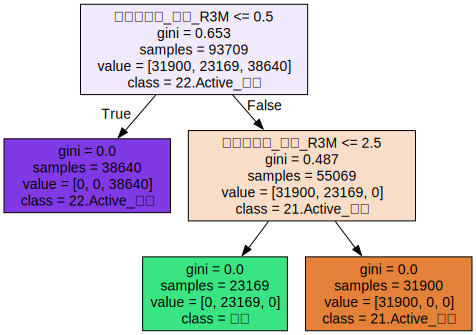

In [47]:
from sklearn.tree import export_graphviz


# export_graphviz() 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=df4['고객구분'].unique(), \
               feature_names = X.columns, impurity=True, filled=True)
               

with open("tree.dot", encoding="utf-8") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [48]:
X = df4.drop(columns=['회원번호','남녀구분코드','자격기준','자격구분상세','연회비청구구분_B0M','거주시도명','거주시군구명','직장시도명','직장시군구명','Life_Stage',
        '고객구분','_1순위신용체크구분','이용금액대','이용개월수_신용_R3M','이용개월수_신용_R6M','이용개월수_신용_R12M'],axis=1)
y = df4['고객구분']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [49]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

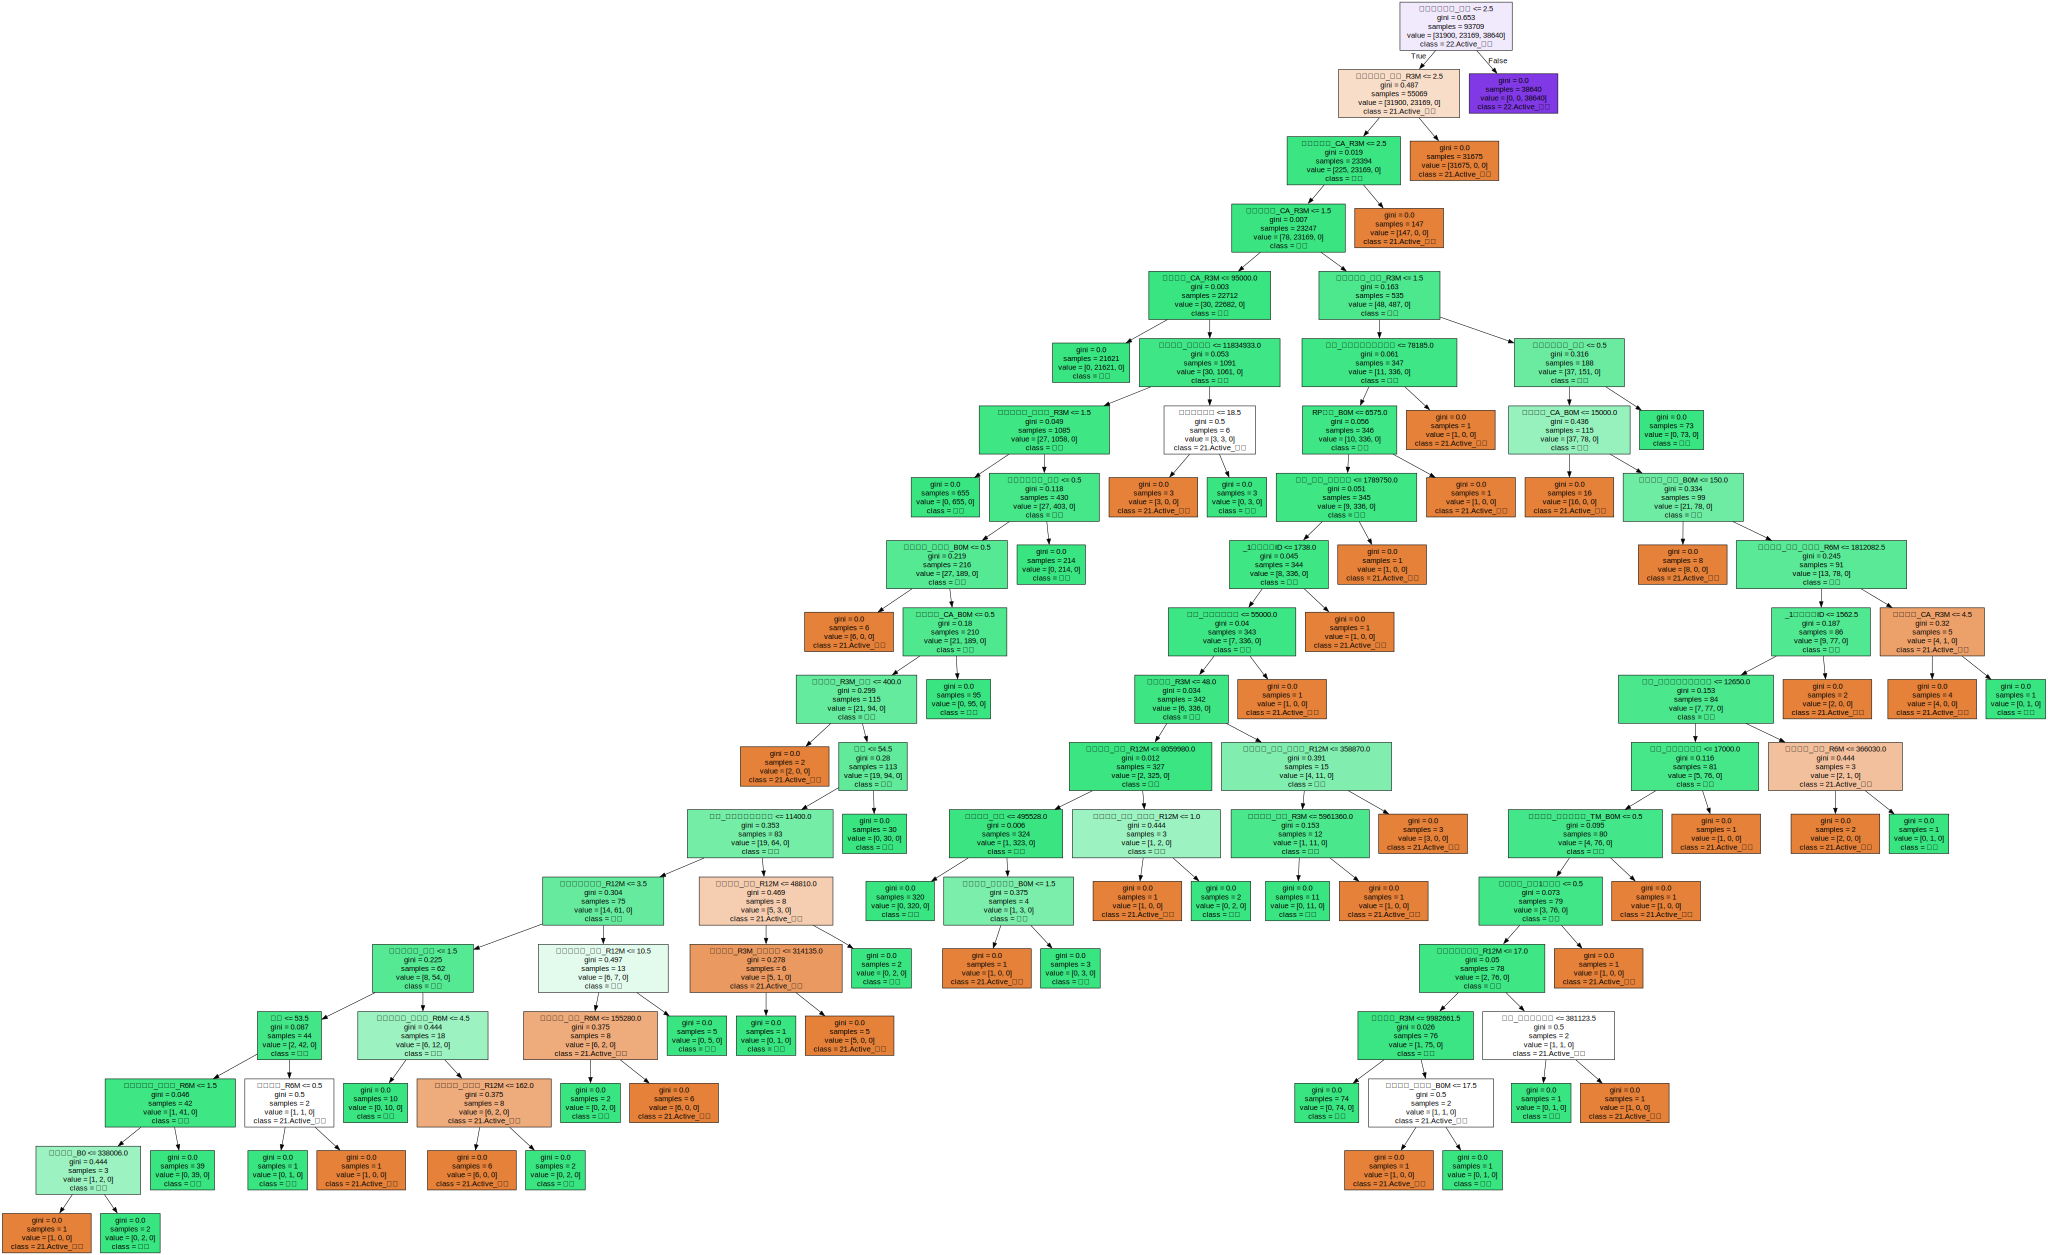

In [59]:
from sklearn.tree import export_graphviz


# export_graphviz() 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=df4['고객구분'].unique(), \
               feature_names = X.columns, impurity=True, filled=True)
               

with open("tree.dot", encoding="utf-8") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [58]:
dot_data = export_graphviz(dt_clf, out_file="tree.dot", class_names=df4['고객구분'].unique(), \
               feature_names = X.columns, impurity=True, filled=True)
                           
graph = graphviz.Source(dot_data)
graph.render(filename='test', format='png')

AttributeError: 'NoneType' object has no attribute 'splitlines'